In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [2]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

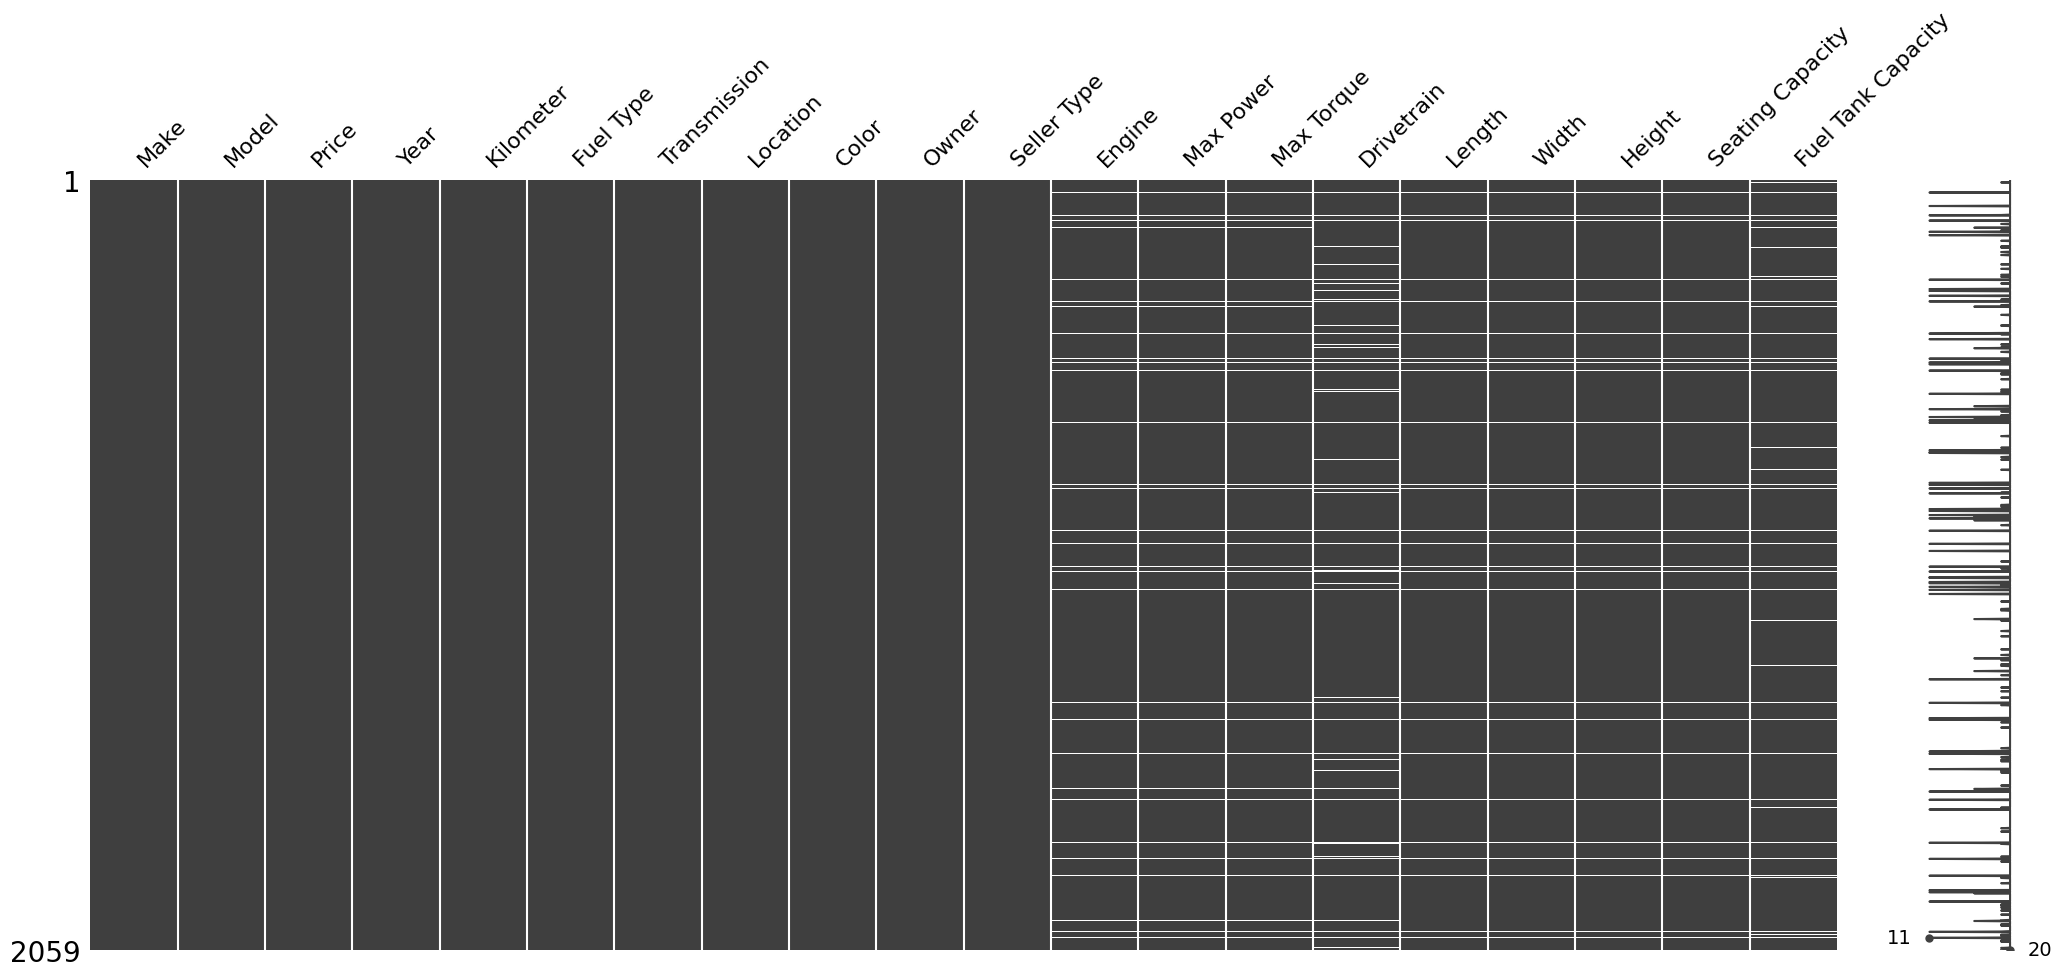

In [3]:
msno.matrix(full_df)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 1485 to 495
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1576 non-null   object 
 12  Max Power           1576 non-null   object 
 13  Max Torque          1576 non-null   object 
 14  Drivetrain          1535 non-null   object 
 15  Length              1590 non-null   float64
 16  Width    

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1576 to 1697
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              403 non-null    object 
 12  Max Power           403 non-null    object 
 13  Max Torque          403 non-null    object 
 14  Drivetrain          388 non-null    object 
 15  Length              405 non-null    float64
 16  Width    

In [8]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1485,Audi,Q7 45 TDI Technology Pack,5200000,2017,45000,Diesel,Automatic,Pune,Grey,Second,Individual,2967 cc,245 bhp @ 2910 rpm,600 Nm @ 1500 rpm,AWD,5052.0,1968.0,1740.0,7.0,75.0
1274,BMW,X1 sDrive20i xLine,3990000,2021,12500,Petrol,Automatic,Delhi,White,First,Individual,1998 cc,189 bhp @ 5000 rpm,280 Nm @ 1350 rpm,FWD,4447.0,1821.0,1598.0,5.0,51.0
1817,Maruti Suzuki,Vitara Brezza ZDi Plus,725000,2017,64000,Diesel,Manual,Kolkata,Gold,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
311,Volvo,V40 D3 Kinetic,1200000,2015,50965,Diesel,Automatic,Kolkata,White,First,Corporate,1984 cc,150 bhp @ 3500 rpm,350 Nm @ 1500 rpm,FWD,4370.0,1783.0,1458.0,5.0,60.0
1061,BMW,3-Series 320d Highline Sedan,1200000,2012,125000,Diesel,Automatic,Ahmedabad,White,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1576,Mercedes-Benz,GLS 450 4MATIC,13100000,2021,17000,Petrol,Automatic,Delhi,White,First,Individual,2999 cc,362 bhp @ 5500 rpm,500 Nm @ 1600 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
1959,Mercedes-Benz,GLE 250 d,4190000,2017,90000,Diesel,Automatic,Ludhiana,Black,First,Individual,2143 cc,201 bhp @ 3800 rpm,500 Nm @ 1600 rpm,AWD,4819.0,2141.0,1796.0,5.0,93.0
843,Maruti Suzuki,Baleno Zeta 1.2,825000,2021,8499,Petrol,Manual,Thane,Yellow,First,Individual,1197 cc,83 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3995.0,1745.0,1500.0,5.0,37.0
1539,Hyundai,Verna 1.6 CRDI SX (O),965000,2018,87001,Diesel,Manual,Delhi,White,First,Individual,1582 cc,126 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0
440,Hyundai,Grand i10 Magna 1.2 Kappa VTVT [2017-2020],450000,2016,53300,Petrol,Manual,Pune,Maroon,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0


In [10]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)


In [11]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [12]:
train_df = train_df.dropna()
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

<Axes: >

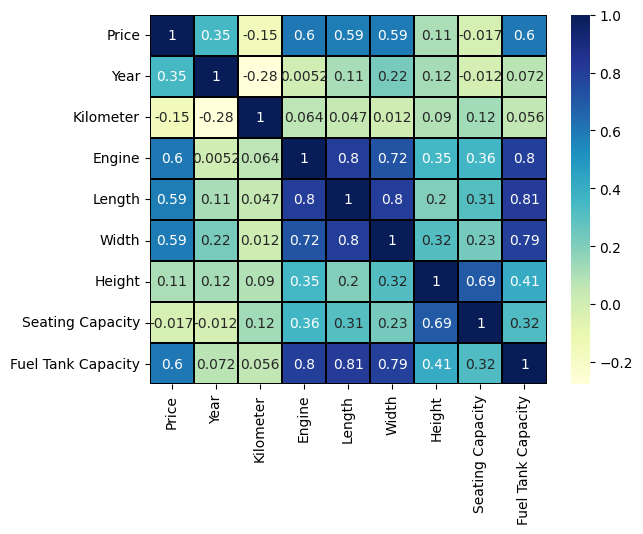

In [13]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [14]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [15]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [16]:
train_df['bhp'].replace('', np.nan, inplace=True)
train_df['rpm power'].replace('', np.nan, inplace=True)
train_df['Nm'].replace('', np.nan, inplace=True)
train_df['rpm torque'].replace('', np.nan, inplace=True)

In [17]:
train_df = train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                                 Model    Price  Year  \
Make                                                                   
Audi 1485  Audi             Q7 45 TDI Technology Pack  5200000  2017   
     1194  Audi                   A4 2.0 TDI (143bhp)  1575000  2014   
     1377  Audi  A4 1.8 TFSI Multitronic Premium Plus  3125000  2020   
     555   Audi       Q3 2.0 TDI quattro Premium Plus  1513000  2015   
     81    Audi        Q3 35 TDI quattro Premium Plus  2900000  2018   

           Kilometer Fuel Type Transmission   Location  Color   Owner  ...  \
Make                                                                   ...   
Audi 1485      45000    Diesel    Automatic       Pune   Grey  Second  ...   
     1194      15000    Diesel    Automatic      Delhi    Red   First  ...   
     1377      28600    Petrol    Automatic    Lucknow  White   First  ...   
     555       79000    Diesel    Automatic  Ahmedabad   Blue  Second  ...   
     81        35000    Diesel    Automatic       Pune  White   First  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 1485        AWD  5052.0  1968.0  1740.0               7.0   
     1194        FWD  4701.0  1826.0  1427.0               5.0   
     1377        FWD  4701.0  1826.0  1427.0               5.0   
     555         AWD  4385.0  1831.0  1608.0               5.0   
     81          AWD  4385.0  1831.0  1608.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 1485                75.0  245       2910  600       1500  
     1194                63.0  141       4200  320       1750  
     1377                63.0  170       3800  320       1400  
     555                 64.0  174       4200  380       1750  
     81                  64.0  184       3500  380       1750  

[5 rows x 22 columns]

In [18]:
train_df = train_df.dropna()

<Axes: >

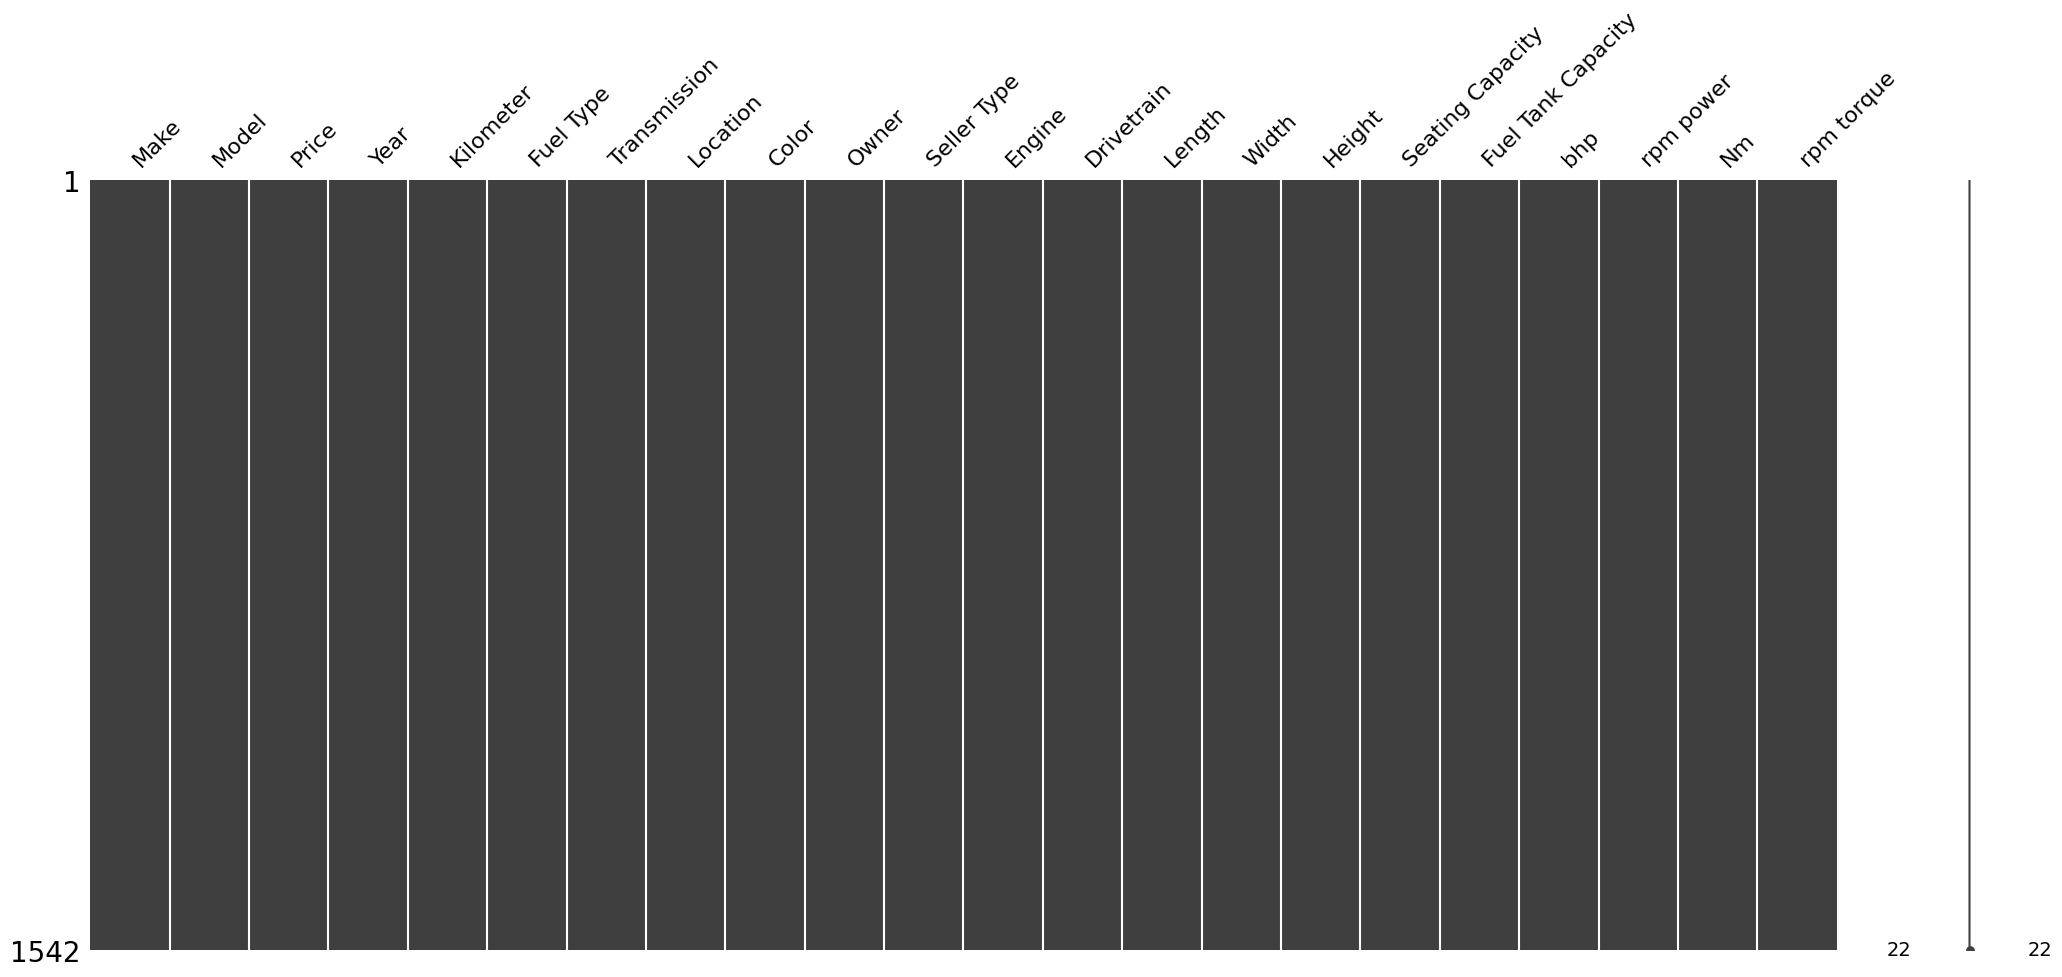

In [19]:
msno.matrix(train_df)

In [20]:
train_df.head()

Make                                 Model    Price  Year  \
Make                                                                   
Audi 1485  Audi             Q7 45 TDI Technology Pack  5200000  2017   
     1194  Audi                   A4 2.0 TDI (143bhp)  1575000  2014   
     1377  Audi  A4 1.8 TFSI Multitronic Premium Plus  3125000  2020   
     555   Audi       Q3 2.0 TDI quattro Premium Plus  1513000  2015   
     81    Audi        Q3 35 TDI quattro Premium Plus  2900000  2018   

           Kilometer Fuel Type Transmission   Location  Color   Owner  ...  \
Make                                                                   ...   
Audi 1485      45000    Diesel    Automatic       Pune   Grey  Second  ...   
     1194      15000    Diesel    Automatic      Delhi    Red   First  ...   
     1377      28600    Petrol    Automatic    Lucknow  White   First  ...   
     555       79000    Diesel    Automatic  Ahmedabad   Blue  Second  ...   
     81        35000    Diesel    Automatic       Pune  White   First  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 1485        AWD  5052.0  1968.0  1740.0               7.0   
     1194        FWD  4701.0  1826.0  1427.0               5.0   
     1377        FWD  4701.0  1826.0  1427.0               5.0   
     555         AWD  4385.0  1831.0  1608.0               5.0   
     81          AWD  4385.0  1831.0  1608.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 1485                75.0  245       2910  600       1500  
     1194                63.0  141       4200  320       1750  
     1377                63.0  170       3800  320       1400  
     555                 64.0  174       4200  380       1750  
     81                  64.0  184       3500  380       1750  

[5 rows x 22 columns]

In [21]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [22]:
train_df = train_df.dropna()

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

<Axes: >

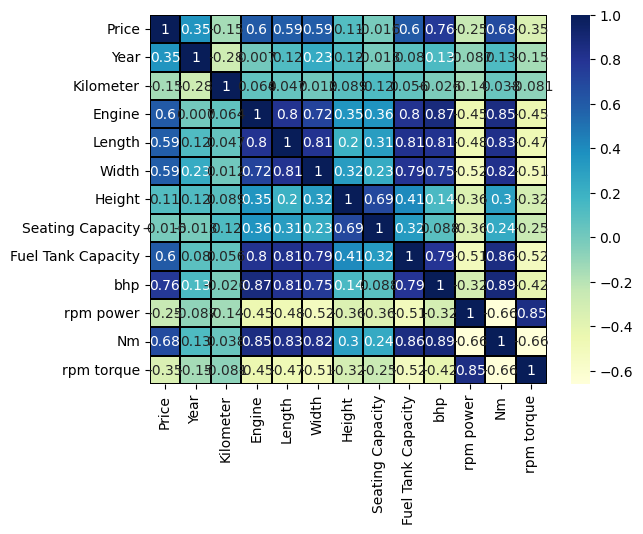

In [24]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [25]:
train_df.head()

Make                                 Model     Price  Year  \
Make                                                                    
Audi 1485  Audi             Q7 45 TDI Technology Pack  0.187643    12   
     1194  Audi                   A4 2.0 TDI (143bhp)  0.055590     9   
     1377  Audi  A4 1.8 TFSI Multitronic Premium Plus  0.112054    15   
     555   Audi       Q3 2.0 TDI quattro Premium Plus  0.053331    10   
     81    Audi        Q3 35 TDI quattro Premium Plus  0.103858    13   

           Kilometer Fuel Type Transmission   Location  Color   Owner  ...  \
Make                                                                   ...   
Audi 1485     0.0225    Diesel    Automatic       Pune   Grey  Second  ...   
     1194     0.0075    Diesel    Automatic      Delhi    Red   First  ...   
     1377     0.0143    Petrol    Automatic    Lucknow  White   First  ...   
     555      0.0395    Diesel    Automatic  Ahmedabad   Blue  Second  ...   
     81       0.0175    Diesel    Automatic       Pune  White   First  ...   

          Drivetrain    Length     Width    Height  Seating Capacity  \
Make                                                                   
Audi 1485        AWD  0.790688  0.661745  0.642857          0.833333   
     1194        FWD  0.648583  0.471141  0.204482          0.500000   
     1377        FWD  0.648583  0.471141  0.204482          0.500000   
     555         AWD  0.520648  0.477852  0.457983          0.500000   
     81          AWD  0.520648  0.477852  0.457983          0.500000   

           Fuel Tank Capacity       bhp  rpm power        Nm  rpm torque  
Make                                                                      
Audi 1485            0.666667  0.392523   0.000000  0.754098    0.068182  
     1194            0.533333  0.198131   0.241573  0.371585    0.125000  
     1377            0.533333  0.252336   0.166667  0.371585    0.045455  
     555             0.544444  0.259813   0.241573  0.453552    0.125000  
     81              0.544444  0.278505   0.110487  0.453552    0.125000  

[5 rows x 22 columns]

In [26]:
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
train_df = one_hot_encode(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [27]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                         
Audi 1485             Q7 45 TDI Technology Pack  0.187643    12     0.0225   
     1194                   A4 2.0 TDI (143bhp)  0.055590     9     0.0075   
     1377  A4 1.8 TFSI Multitronic Premium Plus  0.112054    15     0.0143   
     555        Q3 2.0 TDI quattro Premium Plus  0.053331    10     0.0395   
     81          Q3 35 TDI quattro Premium Plus  0.103858    13     0.0175   

             Engine    Length     Width    Height  Seating Capacity  \
Make                                                                  
Audi 1485  0.392594  0.790688  0.661745  0.642857          0.833333   
     1194  0.225201  0.648583  0.471141  0.204482          0.500000   
     1377  0.196716  0.648583  0.471141  0.204482          0.500000   
     555   0.225201  0.520648  0.477852  0.457983          0.500000   
     81    0.225201  0.520648  0.477852  0.457983          0.500000   

           Fuel Tank Capacity  ...  Owner_Fourth  Owner_Second  Owner_Third  \
Make                           ...                                            
Audi 1485            0.666667  ...         False          True        False   
     1194            0.533333  ...         False         False        False   
     1377            0.533333  ...         False         False        False   
     555             0.544444  ...         False          True        False   
     81              0.544444  ...         False         False        False   

           Owner_UnRegistered Car  Seller Type_Commercial Registration  \
Make                                                                     
Audi 1485                   False                                False   
     1194                   False                                False   
     1377                   False                                False   
     555                    False                                False   
     81                     False                                False   

           Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                       
Audi 1485                  False                    True            True   
     1194                  False                    True           False   
     1377                  False                    True           False   
     555                   False                    True            True   
     81                    False                    True            True   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 1485           False           False  
     1194            True           False  
     1377            True           False  
     555            False           False  
     81             False           False  

[5 rows x 159 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1542 entries, ('Audi', 1485) to ('Volvo', 1923)
Columns: 159 entries, Model to Drivetrain_RWD
dtypes: bool(145), float64(12), int64(1), object(1)
memory usage: 470.3+ KB


In [29]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.36


In [31]:
y_adv = y
X_adv = train_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.54


In [33]:
model.score(X_test, y_test)

0.5445110361756191